In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
Meteo = pd.DataFrame(pd.read_csv("meteo-vid-2018.csv", engine = "python"))

In [3]:
Flujos = pd.DataFrame(pd.read_csv("flujos-vid-2018.csv", engine = "python"))

In [4]:
#Parte 1

In [5]:
Meteo.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [6]:
Meteo.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [7]:
Meteo["Date"] = pd.to_datetime(Meteo.apply(lambda x: x['Date'], 1), dayfirst = True)      

In [8]:
Meteo2 = pd.DataFrame([])
Meteo2["MONTH"] = Meteo["Date"].dt.month
Meteo2["DAY"] = Meteo["Date"].dt.day
Meteo2["Air_Vel"] = Meteo["WS_ms_S_WVT"]
Meteo2["Temp"] = Meteo["AirTC_Avg"]
Meteo2["RH"] = Meteo["RH"]
Meteo2["Rs"] = Meteo["Rs_net_Avg"]
Meteo2["Albedo"] = Meteo["albedo_Avg"]
Meteo2.head()

,MONTH,DAY,Air_Vel,Temp,RH,Rs,Albedo
0,1,6,2.33,27.75,20.61,36.01,0
1,1,6,3.12,26.57,25.25,22.34,0
2,1,6,2.54,25.01,26.45,1.40,0
3,1,6,2.01,23.65,29.22,-3.15,-0.16
4,1,6,2.14,22.84,31.08,-2.84,-0.15


In [9]:
Meteo2.dtypes

MONTH        int64
DAY          int64
Air_Vel    float64
Temp       float64
RH         float64
Rs         float64
Albedo      object
dtype: object

In [10]:
Meteo2["Albedo"] = pd.to_numeric(Meteo2["Albedo"], errors = "coerce")

In [11]:
Meteo2["Tmax"] = Meteo2.groupby(["MONTH"])["Temp"].transform("max")
Meteo2["Tmin"] = Meteo2.groupby(["MONTH"])["Temp"].transform("min")
Meteo2["Tmean"] = Meteo2.groupby(["MONTH"])["Temp"].transform("mean")

Meteo2["RHmax"] = Meteo2.groupby(["MONTH"])["RH"].transform("max")
Meteo2["RHmin"] = Meteo2.groupby(["MONTH"])["RH"].transform("min")
Meteo2["RHmean"] = Meteo2.groupby(["MONTH"])["RH"].transform("mean")

Meteo2["Albedo_mean"] = Meteo2.groupby(["MONTH"])["Albedo"].transform("mean")

Meteo2["AirVel"] = Meteo2.groupby(["MONTH"])["Air_Vel"].transform("mean")
Meteo2["RS"] = Meteo2.groupby(["MONTH"])["Rs"].transform("mean")

f = len(Meteo2)
latt = [ ]
long = [ ]
elev = [ ]

for i in range (0,f):
    
    latt0 = 28.918611
    long0 = -111.310639
    elev0 = 101
    
    latt.append(latt0)
    long.append(long0)
    elev.append(elev0)
    
Meteo2["Latitud"] = latt
Meteo2["Longitud"] = long
Meteo2["Elevacion"] = elev
Meteo2.head()

,MONTH,DAY,Air_Vel,Temp,RH,Rs,Albedo,Tmax,Tmin,Tmean,RHmax,RHmin,RHmean,Albedo_mean,AirVel,RS,Latitud,Longitud,Elevacion
0,1,6,2.33,27.75,20.61,36.01,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,-0.423822,1.943827,111.861695,28.918611,-111.310639,101
1,1,6,3.12,26.57,25.25,22.34,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,-0.423822,1.943827,111.861695,28.918611,-111.310639,101
2,1,6,2.54,25.01,26.45,1.40,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,-0.423822,1.943827,111.861695,28.918611,-111.310639,101
3,1,6,2.01,23.65,29.22,-3.15,-0.16,33.35,0.54,16.963975,91.6,5.98,38.471432,-0.423822,1.943827,111.861695,28.918611,-111.310639,101
4,1,6,2.14,22.84,31.08,-2.84,-0.15,33.35,0.54,16.963975,91.6,5.98,38.471432,-0.423822,1.943827,111.861695,28.918611,-111.310639,101


In [12]:
Meteo3 = pd.DataFrame([ ])
Meteo3["LATT"] = Meteo2["Latitud"].copy()
Meteo3["LONG"] = Meteo2["Longitud"].copy()
Meteo3["ELEV"] = Meteo2["Elevacion"].copy()
Meteo3["MONTH"] = Meteo2["MONTH"].copy()
Meteo3["Tmax"] = Meteo2["Tmax"].copy()
Meteo3["Tmin"] = Meteo2["Tmin"].copy()
Meteo3["Tmean"] = Meteo2["Tmean"].copy()
Meteo3["Albedo_mean"] = Meteo2["Albedo_mean"].copy()
Meteo3["RHmax"] = Meteo2["RHmax"].copy()
Meteo3["RHmin"] = Meteo2["RHmin"].copy()
Meteo3["RHmean"] = Meteo2["RHmean"].copy()
Meteo3["AirVel"] = Meteo2["AirVel"].copy()
Meteo3["RS"] = Meteo2["RS"].copy()

#Aquí van duplicados los datos de cada mes, así que los borramos y nos quedamos con uno por cada mes.
Meteo3 = Meteo3.drop_duplicates()
Meteo3.reset_index(inplace = True)
Meteo3.head()

,index,LATT,LONG,ELEV,MONTH,Tmax,Tmin,Tmean,Albedo_mean,RHmax,RHmin,RHmean,AirVel,RS
0,0,28.918611,-111.310639,101,1,33.35,0.54,16.963975,-0.423822,91.60,5.98,38.471432,1.943827,111.861695
1,1214,28.918611,-111.310639,101,2,31.47,0.07,17.230275,-0.479545,99.53,6.76,48.168006,1.964189,126.347812
2,2558,28.918611,-111.310639,101,3,35.22,3.06,19.282359,-0.409137,89.73,6.76,36.968353,1.926196,170.105269
3,4046,28.918611,-111.310639,101,4,36.30,5.43,21.880618,-0.386088,93.40,5.23,40.785667,2.101812,213.415993
4,5486,28.918611,-111.310639,101,5,38.18,7.13,23.650034,-0.367835,94.60,8.19,44.233468,2.113918,237.177688


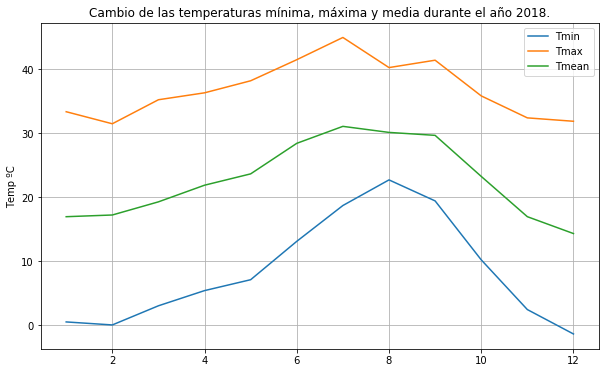

In [13]:
plt.figure(1, figsize = (10, 6))
plt.plot(Meteo3.MONTH, Meteo3.Tmin)
plt.plot(Meteo3.MONTH, Meteo3.Tmax)
plt.plot(Meteo3.MONTH, Meteo3.Tmean)
plt.title("Cambio de las temperaturas mínima, máxima y media durante el año 2018.")
plt.ylabel("Temp ºC")
plt.gca().legend(('Tmin','Tmax', "Tmean"))
plt.grid(True)
plt.show()

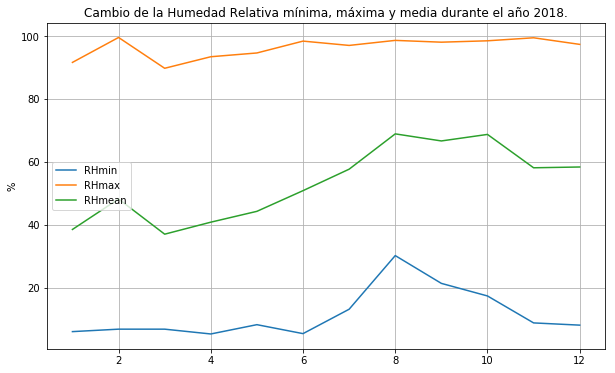

In [14]:
plt.figure(1, figsize = (10, 6))
plt.plot(Meteo3.MONTH, Meteo3.RHmin)
plt.plot(Meteo3.MONTH, Meteo3.RHmax)
plt.plot(Meteo3.MONTH, Meteo3.RHmean)
plt.title("Cambio de la Humedad Relativa mínima, máxima y media durante el año 2018.")
plt.ylabel("%")
plt.gca().legend(('RHmin','RHmax', "RHmean"))
plt.grid(True)
plt.show()

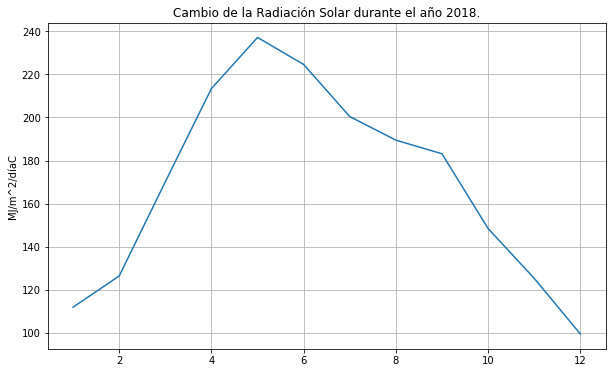

In [15]:
plt.figure(1, figsize = (10, 6))
plt.plot(Meteo3.MONTH, Meteo3.RS)
plt.title("Cambio de la Radiación Solar durante el año 2018.")
plt.ylabel("MJ/m^2/díaC")
plt.grid(True)
plt.show()

In [16]:
#Parte 2

In [17]:
h = len(Meteo3)
JH = [ ]
Val1 = [ ]
pi = 3.14159

for i in range (0, h):
    
    k1 = (0.0252 * Meteo3.Tmean[i] + 0.078) * Meteo3.RS[i]
    JH.append(k1)
    
    k2 = 0.0393 * Meteo3.RS[i] * (Meteo3.Tmean[i] + 9.5) ** 0.5 - 0.19 * (Meteo3.RS[i] ** 0.6) * ( (pi/180) * (latt0) ) ** 0.15 + \
        0.0061 * (Meteo3.Tmean[i] + 20) * (1.12 * Meteo3.Tmean[i] - Meteo3.Tmin[i] - 2) ** 0.7
    Val1.append(k2)

In [18]:
Val4 = [ ]

for i in range (0, f):

    J = int(275 * Meteo2.MONTH[i]/9 - 30 + Meteo2.DAY[i]) - 2
    
    d_r = 1 + 0.033 * math.cos(2 * J * pi/365)
    
    Delta = 0.409 * math.sin(2 * J * pi / 365 - 1.39)
    
    Ws = math.acos(-math.tan(latt0 * pi / 180) * math.tan(Delta))
    
    Ra = (24 * 60 / pi) * d_r * (Ws * math.sin(Delta) * math.sin(latt0 * pi / 180) + math.cos(Delta) * math.cos(latt0 *
          pi / 180) * math.sin(Ws))
    
    k3 = 0.051 * (1 - Meteo2.Albedo_mean[i]) * Meteo2.RS[i] * (Meteo2.Tmean[i] + 9.5) ** 0.5 - 2.4 * (Meteo2.RS[i] / Ra) ** 2 + 0.048 * (Meteo2.Tmean[i] + 20) * (1 - Meteo2.RHmean[i] / 100) * \
        (0.5 + 0.536 * Meteo2.AirVel[i]) + 0.00012 * elev0
    
    Val4.append(k3)

In [19]:
Meteo4 = pd.DataFrame([])
Meteo4["MONTH"] = Meteo2.MONTH
Meteo4["ET0_Val4"] = Val4
Meteo4["ET0_Val4"] = Meteo4.groupby(["MONTH"])["ET0_Val4"].transform("mean")
Meteo4 = Meteo4.drop_duplicates()

In [20]:
Meteo4.reset_index(inplace = True)
Meteo4["ET0_Val1"] = Val1
Meteo4["ET0_JH"] = JH

In [21]:
Meteo4

,index,MONTH,ET0_Val4,ET0_Val1,ET0_JH
0,0,1,43.063288,21.310199,56.545212
1,1214,2,50.356030,24.210628,64.715721
2,2558,3,66.957845,33.834979,95.924988
3,4046,4,85.921578,44.563197,134.322228
4,5486,5,96.613538,51.067272,159.853219
5,6974,6,98.906550,52.063888,178.380785
6,8414,7,78.704097,48.026438,172.534524
7,9902,8,84.785890,44.307656,158.592629
8,11390,9,87.563201,42.835504,151.169927
9,12830,10,70.390972,31.589043,98.529331


In [22]:
Meteo4 = Meteo4.drop(["index"], 1)

In [23]:
Meteo4

,MONTH,ET0_Val4,ET0_Val1,ET0_JH
0,1,43.063288,21.310199,56.545212
1,2,50.356030,24.210628,64.715721
2,3,66.957845,33.834979,95.924988
3,4,85.921578,44.563197,134.322228
4,5,96.613538,51.067272,159.853219
5,6,98.906550,52.063888,178.380785
6,7,78.704097,48.026438,172.534524
7,8,84.785890,44.307656,158.592629
8,9,87.563201,42.835504,151.169927
9,10,70.390972,31.589043,98.529331


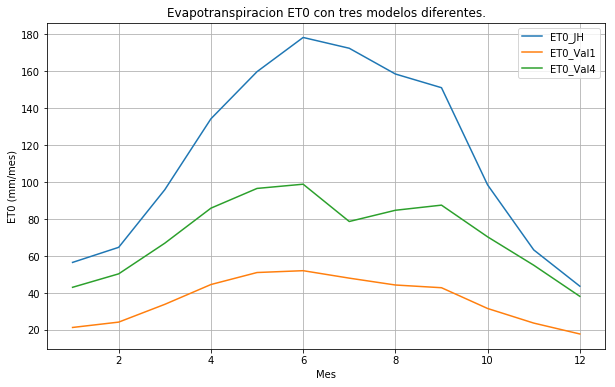

In [24]:
plt.figure(1, figsize = (10, 6))

plt.plot(Meteo4.MONTH, Meteo4.ET0_JH)
plt.plot(Meteo4.MONTH, Meteo4.ET0_Val1)
plt.plot(Meteo4.MONTH, Meteo4.ET0_Val4)
plt.title("Evapotranspiracion ET0 con tres modelos diferentes.")
plt.ylabel("ET0 (mm/mes)")
plt.xlabel("Mes")
plt.gca().legend(('ET0_JH', 'ET0_Val1', "ET0_Val4"))
plt.grid(True)
plt.show()

In [25]:
#Parte 3

In [26]:
Flujos.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [27]:
Flujo2 = pd.DataFrame([])

Flujo2["YEAR"] = Flujos["Year"]
Flujo2["DAY"] = Flujos["DoY"]
Flujo2["HOUR"] = Flujos["Hour"]

Flujo2["Rn_G"] = Flujos["Rg_f"]
Flujo2["LET"] = Flujos["LE_f"]
Flujo2["H"] = Flujos["H_f"]

Flujo2.head()

,YEAR,DAY,HOUR,Rn_G,LET,H
0,--,--,--,Wm-2,Wm-2,Wm-2
1,2018,7,0.5,-0.87,11.52,-20.04
2,2018,7,1,-0.97,15.11,-7.34
3,2018,7,1.5,-0.96,8.61,-9.76
4,2018,7,2,-2.06,1.93,-8.55


In [28]:
Flujo2 = Flujo2.drop([0])

In [29]:
Flujo2.head()

,YEAR,DAY,HOUR,Rn_G,LET,H
1,2018,7,0.5,-0.87,11.52,-20.04
2,2018,7,1,-0.97,15.11,-7.34
3,2018,7,1.5,-0.96,8.61,-9.76
4,2018,7,2,-2.06,1.93,-8.55
5,2018,7,2.5,-1.32,6.40,-0.55


In [30]:
Flujo2["DAY"] = pd.to_numeric(Flujo2["DAY"], errors = "coerce")

In [31]:
Flujo3 = pd.DataFrame([ ])

rng = [ ]
let = [ ]
h = [ ]
day = [ ]
year = [ ]
hour = [ ]

for i in range (1,len(Flujo2)):

    if Flujo2.DAY[i] < 32:
    
        rng.append(Flujo2.Rn_G[i])
        let.append(Flujo2.LET[i])
        h.append(Flujo2.H[i])
        year.append(Flujo2.YEAR[i])
        hour.append(Flujo2.HOUR[i])
        day.append(Flujo2.DAY[i])
        
Flujo3["RnG"] = rng
Flujo3["LET"] = let
Flujo3["H"] = h
Flujo3["Hour"] = hour
Flujo3["Day"] = day

In [32]:
Flujo3.head()

,RnG,LET,H,Hour,Day
0,-0.87,11.52,-20.04,0.5,7
1,-0.97,15.11,-7.34,1,7
2,-0.96,8.61,-9.76,1.5,7
3,-2.06,1.93,-8.55,2,7
4,-1.32,6.40,-0.55,2.5,7


In [33]:
Flujo2["Rn_G"] = pd.to_numeric(Flujo2["Rn_G"], errors = "coerce")
Flujo2["LET"] = pd.to_numeric(Flujo2["LET"], errors = "coerce")
Flujo2["H"] = pd.to_numeric(Flujo2["H"], errors = "coerce")

Flujo3["RnG"] = Flujo2.groupby(["HOUR"])["Rn_G"].transform("mean")
Flujo3["LET"] = Flujo2.groupby(["HOUR"])["LET"].transform("mean")
Flujo3["H"] = Flujo2.groupby(["HOUR"])["H"].transform("mean")

In [34]:
Flujo3.head()

,RnG,LET,H,Hour,Day
0,NaN,NaN,NaN,0.5,7
1,-1.676295,4.328268,-7.451123,1,7
2,-1.673203,3.148412,-6.646295,1.5,7
3,-1.621616,4.676462,-7.123287,2,7
4,-1.576880,4.483637,-7.540920,2.5,7


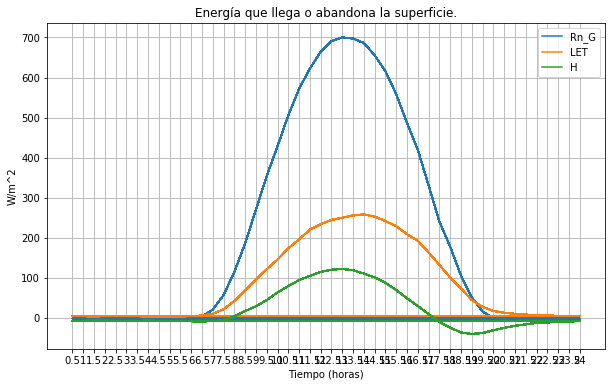

In [35]:
plt.figure(1, figsize = (10, 6))

plt.plot(Flujo3.Hour, Flujo3.RnG)
plt.plot(Flujo3.Hour, Flujo3.LET)
plt.plot(Flujo3.Hour, Flujo3.H)
plt.title("Energía que llega o abandona la superficie.")
plt.ylabel("W/m^2")
plt.xlabel("Tiempo (horas)")
plt.gca().legend(('Rn_G', 'LET', "H"))
plt.grid(True)
plt.show()